In [44]:
# <><> Gabriel Aragão - 2021 <><>

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

class dataset(object):
    '''classe dataset para geracao de dados'''
    # Esta classe gera massas de dados segundo distribuicao gaussiana 
    def __init__(self,desvio=[None],media=[None],size=None):
        '''dataset definido por: '''
        #media  : media desejada para [x,y]
        #desvio : desvio padrao deseja para [x, y]
        #size   : total de pontos a[x,y] 
        #pdfSurp: superficie de probabilidade do sistema
        self.desvio = desvio
        self.media  = media
        self.size   = size
        self.pdfSurp= []

        # gera dados apartir dos parametros 
        self.x      = np.random.normal(self.media[0],self.desvio[0],(self.size,1))
        self.y      = np.random.normal(self.media[1],self.desvio[1],(self.size,1))

        self.media  = [np.mean(self.x),np.mean(self.y)]
        self.desvio = [np.std(self.x),np.std(self.y)]
    def refresh(self):
        # Surface plotting auxiliar stuff
        correlacao, lowLimit,highLimit = 0,0,7
        seqi = np.arange(lowLimit,highLimit,0.06)
        seqj = np.arange(lowLimit,highLimit,0.06)
        X,Y = np.meshgrid(seqi,seqj)
        M0 = [np.zeros([len(seqi),len(seqj)])]
        ci = 0
        for i in seqi:
            cj = 0
            for j in seqj:
                print(self.x[0][0],self.y[0][0])
                print(self.x[1][0],self.y[1][0])
                print(self.x[2][0],self.y[2][0])
                print(self.x[3][0],self.y[3][0])
                aux  = self.pdf2var(self.x[0][i],self.y[0][j],correlacao)
                M0[0][ci-1][cj-1] = aux
                cj = cj + 1
            ci = ci + 1
        self.pdfSurp = M0

    
    def genSeparacao(self,datasets=None):
        '''gera superficie de separacao entre os dados'''
        # dimension and class counters
        lin, col = 0, 0 
        classCount = 0
        
        # dataset shape veryfing
        dataLen = len(datasets[0])
        Mseparacao = datasets[0]
        
        # special stuff hehe
        lowLimit = 0
        highLimit = 6
        seqi = np.arange(lowLimit,highLimit,0.06)
        seqj = np.arange(lowLimit,highLimit,0.06)
        
        for i in range(100):
            for j in range(100):
                #print([datasets[0][i][j],datasets[1][i][j],datasets[2][i][j],datasets[3][i][j]])
                pontos  = np.array([datasets[0][i][j],datasets[1][i][j],datasets[2][i][j],datasets[3][i][j]])
                #print(pontos)
                Mseparacao[i][j] = pontos.argmax()
                print(pontos.argmax(),max(pontos))
                '''
                
                if (maxPonto == datasets[0][i][j]):
                    print(maxPonto, 0)
                    Mseparacao[i][j] = 0
                if (maxPonto == datasets[1][i][j]):
                    print(maxPonto, 1)
                    Mseparacao[i][j] = 1
                if (maxPonto == datasets[2][i][j]):
                    print(maxPonto, 2)
                    Mseparacao[i][j] = 2
                if (maxPonto == datasets[3][i][j]):
                    print(maxPonto, 3)
                    Mseparacao[i][j] = 3
                    '''
        return Mseparacao

    def plotContorno(self,datasets=None,lowLimit=None,highLimit=None):
        # include self in the list of datasets
        datasets.append(self.pdfSurp[0])
        print(datasets)

        # Surface plotting auxiliar stuff
        seqi = np.arange(lowLimit,highLimit,0.06)
        seqj = np.arange(lowLimit,highLimit,0.06)
        X,Y = np.meshgrid(seqi,seqj)
        M0 = [np.zeros([len(seqi),len(seqj)])]
        sumOfDatasetsProbablities = M0
        separationSurface = M0 

        # gera superficie de separacao
        separationSurface = self.genSeparacao(datasets)
        #print(separationSurface)
        # contour
        fig, ax = plt.subplots()
        CS = ax.contourf(X,Y,separationSurface, cmap='prism')
        

        # custumiza eixos
        ax.clabel(CS, inline=0,inline_spacing = 0.01, fontsize=0)
        ax.set_xlim(lowLimit,highLimit)
        ax.set_ylim(lowLimit,highLimit)
        # Axis for interpretation only
        eixos = ['X','Y']
        plt.title(eixos[0]+' vs '+eixos[1])
        plt.xlabel(eixos[1])
        plt.ylabel(eixos[0])
        plt.grid()
        plt.plot()
    def genSurface(self,correlacao,M1,lowLim,highLim):
        '''M1 <- PDF(superficie de probabilidade) do dataset'''
        # correlacao = entre os valores X e Y  
        # M1 = matriz de probabilidades
        # lowLim highLim : limites da superfices
        #
        #
        seqi = np.arange(lowLim,highLim,0.06) 
        seqj = np.arange(lowLim,highLim,0.06)
        ci = 0
        for i in seqi:
            cj = 0
            for j in seqj:
                aux  = self.pdf2var(i,j,correlacao)
                M1[0][ci-1][cj-1] = aux
                cj = cj + 1
            ci = ci + 1
        self.pdfSurp = M1
        return M1 

    def plot3d(self,datasets=None,lowLimit=None,highLimit=None):
        # include self in the list of datasets
        datasets.append(self)

        # Surface plotting auxiliar stuff
        seqi = np.arange(lowLimit,highLimit,0.06)
        seqj = np.arange(lowLimit,highLimit,0.06)
        X,Y = np.meshgrid(seqi,seqj)
        M0 = [np.zeros([len(seqi),len(seqj)])]
        sumOfDatasetsProbablities = M0
        plt.ion()
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        idCount = 0
        # calcula e soma todas superficies de probabilidade 
        if datasets != None:
            for dataset in datasets:
                M0 = dataset.genSurface(correlacao=0,M1=M0,lowLim=lowLimit,highLim=highLimit)
                sumOfDatasetsProbablities = M0[0] + sumOfDatasetsProbablities
                idCount += 1
        surface  = ax.plot_surface(X,Y,sumOfDatasetsProbablities[0],cmap=cm.prism,linewidth=0, antialiased=True)
        # Customize the z axis.
        ax.set_zlim(0,4.0)
        ax.set_xlim(lowLimit,highLimit)
        ax.set_ylim(lowLimit,highLimit)
        ax.zaxis.set_major_locator(LinearLocator(10))
        ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
        # Axis for interpretation only
        eixos = ['X','Y']
        plt.title(eixos[0]+' vs '+eixos[1])
        plt.xlabel(eixos[1])
        plt.ylabel(eixos[0])
        plt.grid()

    def pdf2var(self,x,y,p):
        '''funcao densidade de probabilidade para 2 variaveis'''
        u1,u2 = self.media[1],self.media[0]
        s1,s2 = self.desvio[1],self.desvio[0]
        # x ,y : indices do ponto no espaco R^2
        # u1,u2: media media de cada variavel no dataset 
        # s1,s2: desvio padrao de cada variavel no dataset
        # p    : coeficiente de correlacao 
        A = (1/(2*np.pi*s1*s2*np.sqrt(1-(p**2))))
        B = ((-(1)/(2*(1-(p**2)))))
        C = ((x-u1)**2)/((s1**2))
        D = (((y-u2)**2)/((s2)**2))
        E = ((-2*p*(x-u1)*(y-u2))/(s1*s2)) #termo de covariancia
        return A*np.exp(B*(C+D+E))

    '''TODO: FIX ADD '''    
    def __add__(self,other):
        if self.size == other.size:
            count = 0
            x = self.x + other.x
            y = self.y + other.y
            #print(len(x))
            dataset()
            dataset.x = x
            dataset.y = y
            return dataset()

    def ls(self):
        if input('list metods & attr y/n?') == 'y':
            for attr in dir(self):
                print("obj.%s = %r" % (attr, getattr(self, attr)))

    def info(self):
        print('desvio: '+str(self.desvio))
        print('media : '+str(self.media))
        print('size  : '+str(self.size))
        if input('print all X and Y? y/n') == 'y':
            print(self.x+'--'+self.y)


# Dataset creation
scale = 1
tamanho = 100
gaussianA = dataset(media=[4,4],desvio=[0.8,0.8]*scale,size=tamanho)
gaussianB = dataset(media=[2,2],desvio=[0.6,0.6]*scale,size=tamanho)
gaussianC = dataset(media=[2,4],desvio=[0.2,0.2]*scale,size=tamanho)
gaussianD = dataset(media=[4,2],desvio=[0.9,0.9]*scale,size=tamanho)

gaussianA.refresh()
gaussianB.refresh()
gaussianC.refresh()
gaussianD.refresh()


# Data plotting

lowLimit = 0
upLimit  = 6

plt.xlim(lowLimit,upLimit)
plt.ylim(lowLimit,upLimit)
# Axis for interpretation only
eixos = ['X','Y']
plt.title(eixos[0]+' vs '+eixos[1])
plt.xlabel(eixos[1])
plt.ylabel(eixos[0])
plt.grid()
plt.scatter(gaussianA.x,gaussianA.y,color='orange',marker='.')
plt.plot()
plt.scatter(gaussianB.x,gaussianB.y,color='b',marker='.')
plt.plot()
plt.scatter(gaussianC.x,gaussianC.y,color='g',marker='.')
plt.plot()
plt.scatter(gaussianD.x,gaussianD.y,color='k',marker='.')
plt.plot()

# 3d plotting
gaussianA.plot3d([gaussianB,gaussianC,gaussianD],lowLimit=lowLimit,highLimit=upLimit)

gaussianA.plotContorno([gaussianB.pdfSurp[0],gaussianC.pdfSurp[0],gaussianD.pdfSurp[0]],lowLimit=lowLimit,highLimit=upLimit)



4.182112851008238 3.6698336382410726
3.2500197861062308 4.575323153553502
4.269685253881114 4.541838112118366
4.011767603017826 3.5854974439750995


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

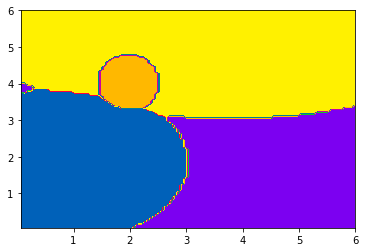

In [43]:

def pdf2var(x,y,u1,u2,s1,s2,p): 
    return (1/(2*np.pi*s1*s2*np.sqrt(1-p**2)))*np.exp((-1/(2*(1-p**2)))*( ((x-u1)**2)/(s1**2) + ((y-u2)**2)/(s2**2) - ((2*p*(x-u1)*(y-u2))/(s1*s2)) ))

x_c1 = (np.random.normal(2,.6,200)).reshape(-1,2)

x_c2 = (np.random.normal(4,.8,200)).reshape(-1,2)

x_c3 = (np.zeros(200)).reshape(-1,2)
x_c3[:,0]=(np.random.normal(2,.2,100))
x_c3[:,1]=(np.random.normal(4,.2,100))

x_c4 = (np.zeros(200)).reshape(-1,2)
x_c4[:,0]=(np.random.normal(4,1,100))
x_c4[:,1]=(np.random.normal(2,1,100))

u1 = (np.mean(x_c1[:,0]),np.mean(x_c1[:,1]))
u2 = (np.mean(x_c2[:,0]),np.mean(x_c2[:,1]))
u3 = (np.mean(x_c3[:,0]),np.mean(x_c3[:,1]))
u4 = (np.mean(x_c4[:,0]),np.mean(x_c4[:,1]))

s1 = (np.std(x_c1[:,0]),np.std(x_c1[:,1]))
s2 = (np.std(x_c2[:,0]),np.std(x_c2[:,1]))
s3 = (np.std(x_c3[:,0]),np.std(x_c3[:,1]))
s4 = (np.std(x_c4[:,0]),np.std(x_c4[:,1]))
x = np.linspace(0.06,6,100)
y = np.linspace(0.06,6,100)
xx, yy = np.meshgrid(x, y)

z1 = pdf2var(xx,yy,u1[0],u1[1],s1[0],s1[1],0)
z2 = pdf2var(xx,yy,u2[0],u2[1],s2[0],s2[1],0)
z3 = pdf2var(xx,yy,u3[0],u3[1],s3[0],s3[1],0)
z4 = pdf2var(xx,yy,u4[0],u4[1],s4[0],s4[1],0)

M = np.zeros(10000).reshape(xx.shape)

for i in range(100):
    for j in range(100):
        lista  = np.array([z1[i][j],z2[i][j],z3[i][j],z4[i][j]])
        max = lista.max()
        if (max == z1[i][j]):
            M[i][j] = 1
        if (max == z2[i][j]):
            M[i][j] = 2
        if (max == z3[i][j]):
            M[i][j] = 3
        if (max == z4[i][j]):
            M[i][j] = 4

plt.contourf(xx, yy, M,cmap='prism')
#plt.scatter(x_c1[:,0],x_c1[:,1])
#plt.scatter(x_c2[:,0],x_c2[:,1])
#plt.scatter(x_c3[:,0],x_c3[:,1])
#plt.scatter(x_c4[:,0],x_c4[:,1])